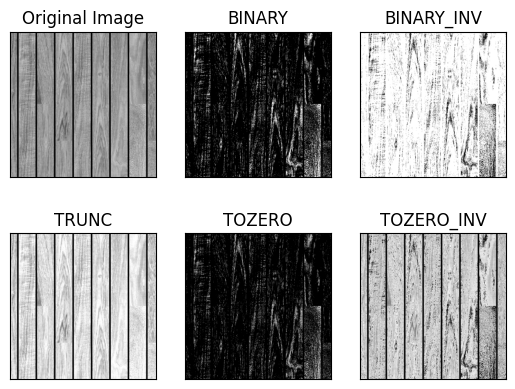

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 1 Простое пороговое значение
img = cv.imread('./wood.jpg', 0)
assert img is not None, "Файл не найден."

# Применение разных типов пороговой фильтрации
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, th3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, th4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, th5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

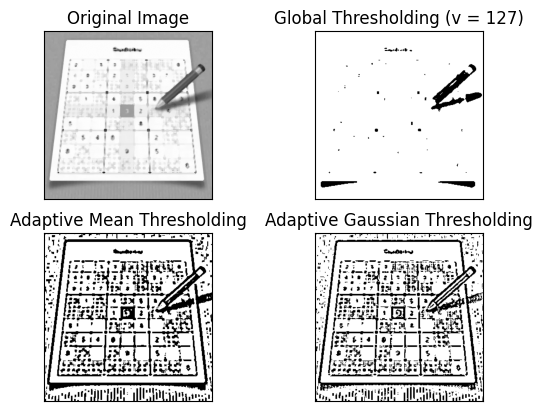

In [2]:
# 2 Адаптивное пороговое значение
img = cv.imread('../lab3/sudoku.jpg', 0)
assert img is not None, "Файл не найден."
img = cv.medianBlur(img, 5)

# Простая глобальная пороговая фильтрация
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Адаптивное пороговое значение на основе среднего
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY, 11, 2)

# Адаптивное пороговое значение на основе гауссового среднего
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

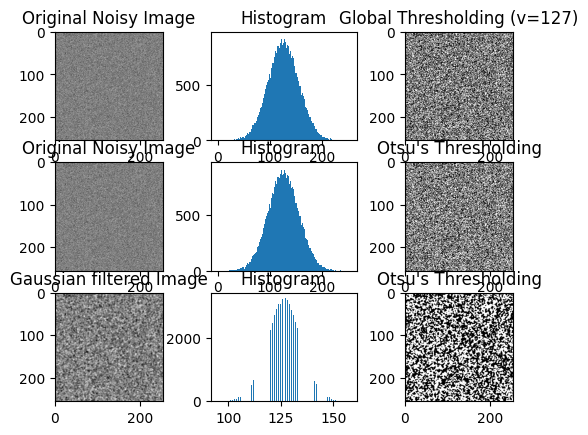

In [3]:
# 3 Метод Оцу

img = cv.imread('./noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден."
# ---------- 1. Глобальное пороговое преобразование ----------
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# ---------- 2. Метод Оцу ----------
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# ---------- 3. Гауссово сглаживание + метод Оцу ----------
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# ---------- Отображение изображений и гистограмм ----------
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3])

    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1])

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2])

plt.show()

In [6]:
img = cv.imread('./noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден."

blur = cv.GaussianBlur(img, (5, 5), 0)

# Расчёт гистограммы и нормализация
hist = cv.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.sum()
Q = hist_norm.cumsum()
bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1, 256):
    p1, p2 = np.hsplit(hist_norm, [i])  # вероятности классов
    q1, q2 = Q[i], Q[255] - Q[i]        # накопленные вероятности
    if q1 < 1e-6 or q2 < 1e-6:
        continue
    b1, b2 = np.hsplit(bins, [i])       # значения интенсивности
    # средние и дисперсии классов
    m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
    v1 = np.sum(((b1 - m1) ** 2) * p1) / q1
    v2 = np.sum(((b2 - m2) ** 2) * p2) / q2
    # минимизация внутриклассовой дисперсии
    fn = v1 * q1 + v2 * q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(f"Manual Otsu threshold = {thresh}, OpenCV Otsu threshold = {ret}")


Manual Otsu threshold = 95, OpenCV Otsu threshold = 126.0
